## 4.6. Kesifsel Veri Analizi - 2. Cok Degiskenli Analiz - Odev

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

title_font = {'family':'arial', 'color':'darkred','weight':'bold','size':13}
axis_font = {'family':'arial','color':'darkblue','weight':'bold','size':10}

In [5]:
ogrenci = pd.read_csv('StudentsPerformance.csv')
ogrenci.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


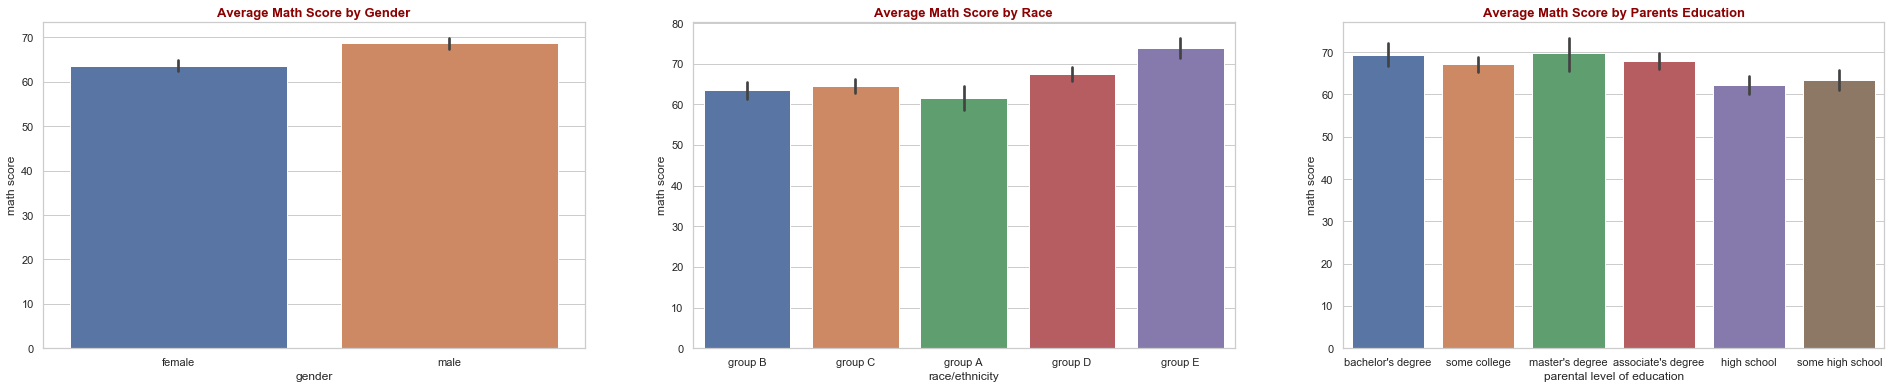

In [6]:
# 1
# Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?
# sadece math score icin bakarsak:

plt.figure(figsize=(33,6))

plt.subplot(1,3,1)
sns.barplot(ogrenci["gender"], ogrenci["math score"])
plt.title("Average Math Score by Gender", fontdict = title_font)

plt.subplot(1,3,2)
sns.barplot(ogrenci["race/ethnicity"], ogrenci["math score"])
plt.title("Average Math Score by Race", fontdict = title_font)

plt.subplot(1,3,3)
sns.barplot(ogrenci["parental level of education"], ogrenci["math score"])
plt.title("Average Math Score by Parents Education", fontdict = title_font)

plt.show()

# gorsel olarak baktigimizda erkek ogrencilerin, group D ve E kokenlerine sahip ogrencilerin ve ebeveynleri lisans ve 
# yuksek lisans egitimi almis olan ogrencilerin matematik dersinde daha yuksek performans gosterdiklerini soyleyebiliriz.


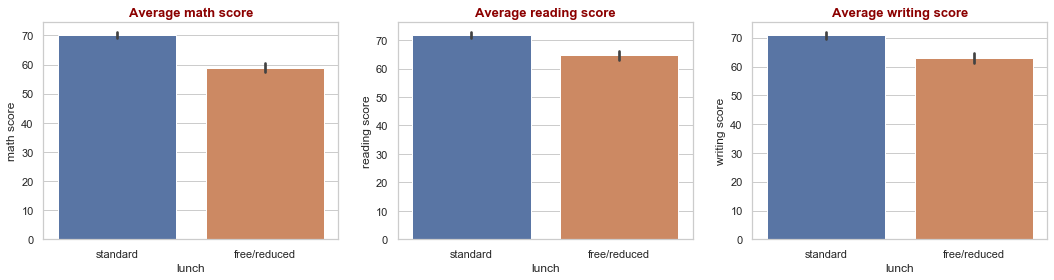

In [7]:
# 2
# Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?

plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.barplot(ogrenci["lunch"], ogrenci["math score"])
plt.title("Average math score", fontdict = title_font)

plt.subplot(1,3,2)
sns.barplot(ogrenci["lunch"], ogrenci["reading score"])
plt.title("Average reading score", fontdict = title_font)

plt.subplot(1,3,3)
sns.barplot(ogrenci["lunch"], ogrenci["writing score"])
plt.title("Average writing score", fontdict = title_font)

plt.show()

# hem gorsel hem de istatistiksel olarak (asagida) baktigimizda standart ogle yemeginin ogrencilerin sinav
# performanslarinda pozitif bir etkisi oldugunu goruyoruz.

In [8]:
ogrenci.dropna(inplace=True)

In [9]:
ogrenci_lunch = ogrenci["lunch"].unique()
grup_ogrenci = ogrenci.groupby("lunch")

In [10]:
pd.options.display.float_format = '{:.5f}'.format
for var in ["math score", "reading score", "writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(ogrenci_lunch)):
        for j in range(i+1, len(ogrenci_lunch)):
            ttest = stats.ttest_ind(ogrenci[ogrenci["lunch"]==ogrenci_lunch[i]][var], 
                                ogrenci[ogrenci["lunch"]==ogrenci_lunch[j]][var])
            group_1 = ogrenci_lunch[i]
            group_2 = ogrenci_lunch[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

math score için karşılaştırma

,group_1,group_2,statistic,p_value
0,standard,free/reduced,11.83718,0.00000


reading score için karşılaştırma

,group_1,group_2,statistic,p_value
0,standard,free/reduced,7.45106,0.00000


writing score için karşılaştırma

,group_1,group_2,statistic,p_value
0,standard,free/reduced,8.00978,0.00000


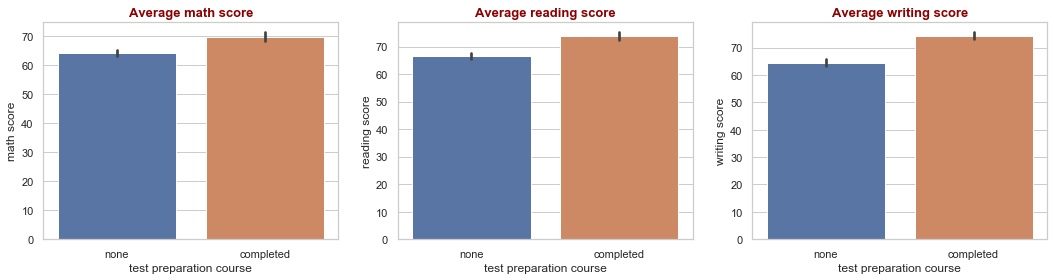

In [11]:
# 3
# Hazırlık kurslarının sinav performansı üzerinde bir etkisi var mı?

plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.barplot(ogrenci["test preparation course"], ogrenci["math score"])
plt.title("Average math score", fontdict = title_font)

plt.subplot(1,3,2)
sns.barplot(ogrenci["test preparation course"], ogrenci["reading score"])
plt.title("Average reading score", fontdict = title_font)

plt.subplot(1,3,3)
sns.barplot(ogrenci["test preparation course"], ogrenci["writing score"])
plt.title("Average writing score", fontdict = title_font)

plt.show()

# hem gorsel hem de istatistiksel olarak (asagida) baktigimizda tamamlanmis hazirlik kurslarinin ogrencilerin sinav
# performanslarinda pozitif bir etkisi oldugunu goruyoruz.

In [12]:
ogrenci_test = ogrenci["test preparation course"].unique()
grup_ogrenci = ogrenci.groupby("test preparation course")

In [13]:
pd.options.display.float_format = '{:.5f}'.format
for var in ["math score", "reading score", "writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(ogrenci_test)):
        for j in range(i+1, len(ogrenci_test)):
            ttest = stats.ttest_ind(ogrenci[ogrenci["test preparation course"]==ogrenci_test[i]][var], 
                                ogrenci[ogrenci["test preparation course"]==ogrenci_test[j]][var])
            group_1 = ogrenci_test[i]
            group_2 = ogrenci_test[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

math score için karşılaştırma

,group_1,group_2,statistic,p_value
0,none,completed,-5.70462,0.00000


reading score için karşılaştırma

,group_1,group_2,statistic,p_value
0,none,completed,-7.87166,0.00000


writing score için karşılaştırma

,group_1,group_2,statistic,p_value
0,none,completed,-10.40917,0.00000


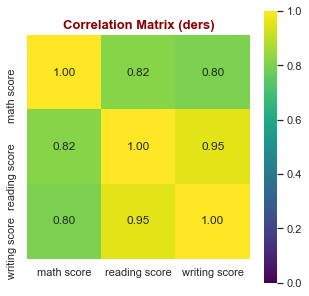

In [15]:
# 4
# Birbiriyle korelasyonu en fazla olan dersler hangisidir?

correlation_ogrenci = ogrenci.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation_ogrenci, square= True, annot=True,fmt='.2f', vmin=0, vmax=1, cmap='viridis')
plt.title('Correlation Matrix (ders)', fontdict=title_font)
plt.show()

# reading ve writing derleri